** solving linear equations
- elimination
- the inverse matrix
- factorisation

** vector spaces and subspaces
- nullspace
- rank and row reduced form
- independence, basis and dimension
- the four fundamental subspaces

** orthogonality
- projections
- least squares approximation
- Gram-Scmidt

** eigenvales and eigenvectors
- diagonalisation
- symmetric matrices
- singular value decomposition (SVD)

** numercial linear algebra
- iterative methods
- norms and condition number
- ill conditioning

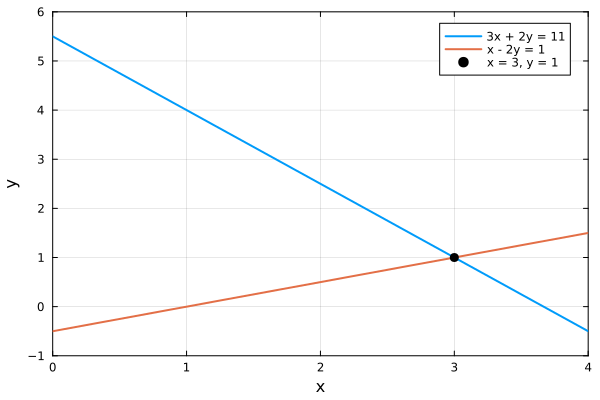

In [1]:
using Plots

# Define the linear functions
f1(x) = (11 - 3x) / 2
f2(x) = (x - 1) / 2

# Define the range for x
x_range = 0:0.1:4

# Plot the lines
plot(x_range, f1.(x_range), label="3x + 2y = 11", lw=2)
plot!(x_range, f2.(x_range), label="x - 2y = 1", lw=2)

# Plot intersection point (3, 1)
scatter!([3], [1], label="x = 3, y = 1", color=:black, marker=:circle, ms=5)

# Add labels and grid
xlabel!("x")
ylabel!("y")
plot!(xlims=(0, 4), ylims=(-1, 6), legend=:topright, framestyle=:box)

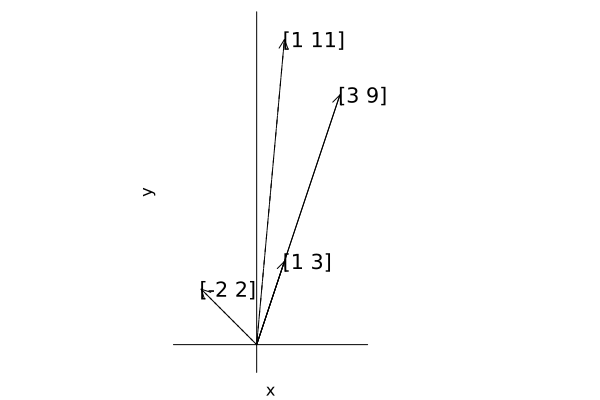

In [2]:
using Plots

# Define the vectors
v1 = [-2, 2]
v2 = [1, 3]
v3 = [3, 9]
result = [1, 11]

# Plot the vectors with quiver
plot(
    xlim=(-3, 4), 
    ylim=(-1, 12), 
    legend=:outertopright,  # Position the legend outside the plot area to the top right
    xlabel="x", 
    ylabel="y", 
    aspect_ratio=:equal, 
    framestyle=:origin, 
    xticks=false, 
    yticks=false, 
    grid=true,
    label=nothing  # Remove default labels for the main plot
)
quiver!([0], [0], quiver=([v1[1]], [v1[2]]), label="[-2, 2]", color=:black, line=:dash)
quiver!([0], [0], quiver=([v2[1]], [v2[2]]), label="[1, 3]", color=:black)
quiver!([0], [0], quiver=([v3[1]], [v3[2]]), label="[3, 9]", color=:black)
quiver!([0], [0], quiver=([result[1]], [result[2]]), color=:black, line=:dash, label="[1, 11]")

# Display labels at the end of each vector
annotate!(v1[1], v1[2], text("[-2 2]", :left))
annotate!(v2[1], v2[2], text("[1 3]", :left))
annotate!(v3[1], v3[2], text("[3 9]", :left))
annotate!(result[1], result[2], text("[1 11]", :left))

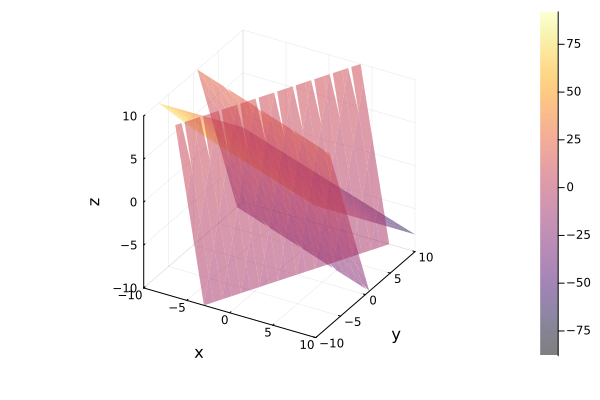

In [3]:
using Plots
# plotly()  # Use Plotly backend without WebIO requirement

# Define the range for x and y
x_range = -10:1:10
y_range = -10:1:10

# Define functions for z in terms of x and y based on the plane equations
f1(x, y) = (6 - x - 2y) / 3
f2(x, y) = (4 - 2x - 5y) / 2
f3(x, y) = (2 - 6x + 3y)

# Create a 3D plot
plot(xlims=(-10, 10), ylims=(-10, 10), zlims=(-10, 10), legend=:topright)

# Plot each plane
surface!(x_range, y_range, f1, opacity=0.5, label="x + 2y + 3z = 6")
surface!(x_range, y_range, f2, opacity=0.5, label="2x + 5y + 2z = 4")
surface!(x_range, y_range, f3, opacity=0.5, label="6x - 3y + z = 2")

# Set axis labels
xlabel!("x")
ylabel!("y")
zlabel!("z")

In [ ]:
### One square system = two triangular systems

#### Example

Solve the following using an LU decomposition:

$
\begin{bmatrix} 2 & 2 \\ 4 & 9 \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix} = \begin{bmatrix} 8 \\ 21 \end{bmatrix}
$


---
To demonstrate the solution using LU decomposition step-by-step, let's go through each stage in solving this system:

Given:

$
\begin{bmatrix} 2 & 2 \\ 4 & 9 \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix} = \begin{bmatrix} 8 \\ 21 \end{bmatrix}
$

1. **Set up the system**: We have:

   $
   A = \begin{bmatrix} 2 & 2 \\ 4 & 9 \end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix} u \\ v \end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix} 8 \\ 21 \end{bmatrix}
   $

2. **LU Decomposition**: We decompose $ A $ into $ L $ (a lower triangular matrix) and $ U $ (an upper triangular matrix).


Given: $
A = \begin{bmatrix} 2 & 2 \\ 4 & 9 \end{bmatrix}
$

- **Initialize $ L $ and $ U $:**

   $
   L = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \quad U = \begin{bmatrix} 2 & 2 \\ 4 & 9 \end{bmatrix}
   $

- **Calculate the elimination factor for the second row:**

   $
   \text{factor} = \frac{U[2, 1]}{U[1, 1]} = \frac{4}{2} = 2
   $

- **Update $ L $:**

   $
   L = \begin{bmatrix} 1 & 0 \\ 2 & 1 \end{bmatrix}
   $

4. **Apply the row operation to $ U $:**

   $
   U[2, :] = U[2, :] - 2 \times U[1, :] = \begin{bmatrix} 0 & 5 \end{bmatrix}
   $

   So, $ U $ becomes:

   $
   U = \begin{bmatrix} 2 & 2 \\ 0 & 5 \end{bmatrix}
   $

   After performing the LU decomposition on $ A $:

   $
   L = \begin{bmatrix} 1 & 0 \\ 2 & 1 \end{bmatrix}, \quad U = \begin{bmatrix} 2 & 2 \\ 0 & 5 \end{bmatrix}
   $

   So, $ A = LU $.

3. **Solve for $ \mathbf{y} $ in $ L \mathbf{y} = \mathbf{b} $**:

   We now have:

   $
   \begin{bmatrix} 1 & 0 \\ 2 & 1 \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \begin{bmatrix} 8 \\ 21 \end{bmatrix}
   $

   - From the first row: $ y_1 = 8 $
   - Substitute $ y_1 = 8 $ into the second row: $ 2 \cdot 8 + y_2 = 21 $
   - Solve for $ y_2 $: $ y_2 = 21 - 16 = 5 $

   Thus, $ \mathbf{y} = \begin{bmatrix} 8 \\ 5 \end{bmatrix} $.

4. **Solve for $ \mathbf{x} $ in $ U \mathbf{x} = \mathbf{y} $**:

   Now we solve:

   $
   \begin{bmatrix} 2 & 2 \\ 0 & 5 \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix} = \begin{bmatrix} 8 \\ 5 \end{bmatrix}
   $

   - From the second row: $ 5v = 5 $ ⟹ $ v = 1 $
   - Substitute $ v = 1 $ into the first row: $ 2u + 2 \cdot 1 = 8 $
   - Solve for $ u $: $ u = \frac{8 - 2}{2} = 3 $

   So, the solution is:

   $
   u = 3, \quad v = 1
   $

5. **Final Answer**:

   $
   \begin{bmatrix} u \\ v \end{bmatrix} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}
   $

Thus, the values of $ u $ and $ v $ that satisfy the system are $ u = 3 $ and $ v = 1 $.

### Example:

Find the condition on $ (b_1, b_2, b_3) $ for $ A \mathbf{x} = \mathbf{b} $ to be solvable if:

$
A = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ -2 & -3 \end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}.
$

This condition puts $ \mathbf{b} $ in the column space of $ A $. Find the complete $ \mathbf{x} = \mathbf{x}_p + \mathbf{x}_n $.

To solve this, we analyze the problem step by step:

---

### Step 1: The Column Space of $ A $

The column space of $ A $ consists of all linear combinations of the columns of $ A $. For $ A \mathbf{x} = \mathbf{b} $ to have a solution, $ \mathbf{b} $ must lie in the column space of $ A $. In other words, $ \mathbf{b} $ must satisfy the condition:

$
\mathbf{b} \in \text{Col}(A).
$

---

### Step 2: Checking Linear Dependence of $ A $'s Rows

The matrix $ A $ is:

$
A = \begin{bmatrix} 
1 & 1 \\ 
1 & 2 \\ 
-2 & -3 
\end{bmatrix}.
$

To determine the condition on $ \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} $, we check the rank of $ A $. Performing row reduction on $ A $:

$
\begin{bmatrix} 
1 & 1 \\ 
1 & 2 \\ 
-2 & -3 
\end{bmatrix}
\rightarrow
\begin{bmatrix} 
1 & 1 \\ 
0 & 1 \\ 
0 & 0 
\end{bmatrix}.
$

The rank of $ A $ is $ 2 $, meaning the column space is two-dimensional. Hence, the nullspace has dimension $ 1 $, and we need $ \mathbf{b} $ to satisfy one linear constraint to be in the column space.

---

### Step 3: Condition on $ \mathbf{b} $

To find the condition, augment $ A $ with $ \mathbf{b} $:

$
\begin{bmatrix} 
1 & 1 & b_1 \\ 
1 & 2 & b_2 \\ 
-2 & -3 & b_3 
\end{bmatrix}.
$

Perform Gaussian elimination:

1. Subtract row 1 from row 2:
$
\begin{bmatrix} 
1 & 1 & b_1 \\ 
0 & 1 & b_2 - b_1 \\ 
-2 & -3 & b_3 
\end{bmatrix}.
$

$
\begin{bmatrix} 
1 & 1 & b_1 \\ 
0 & 1 & b_2 - b_1 \\ 
0 & -1 & b_3 + 2b_1 
\end{bmatrix}.
$

If we **add row 2 to row 3**, the resulting matrix becomes:

$
\begin{bmatrix} 
1 & 1 & b_1 \\ 
0 & 1 & b_2 - b_1 \\ 
0 & 0 & (b_3 + 2b_1) + (b_2 - b_1)
\end{bmatrix}.
$

Simplify the third row:

$
b_3 + 2b_1 + b_2 - b_1 = b_3 + b_1 + b_2.
$

Thus, the augmented matrix becomes:

$
\begin{bmatrix} 
1 & 1 & b_1 \\ 
0 & 1 & b_2 - b_1 \\ 
0 & 0 & b_3 + b_1 + b_2 
\end{bmatrix}.
$

---

### Step 4: General Solution $ \mathbf{x} = \mathbf{x}_p + \mathbf{x}_n $

The general solution to $ A \mathbf{x} = \mathbf{b} $ can be expressed as the sum of a particular solution $ \mathbf{x}_p $ and a solution $ \mathbf{x}_n $ in the nullspace of $ A $:

1. **Nullspace of $ A $:**

The nullspace of $ A $ is obtained by solving $ A \mathbf{x}_n = 0 $. From Gaussian elimination, we have:

$
\mathbf{x}_n = t \begin{bmatrix} -1 \\ 1 \end{bmatrix}, \quad t \in \mathbb{R}.
$

2. **Particular Solution $ \mathbf{x}_p $:**

A particular solution can be obtained by solving $ A \mathbf{x}_p = \mathbf{b} $. Using Gaussian elimination, substitute values of $ b_1, b_2, b_3 $ (satisfying $ b_3 + 3b_1 - b_2 = 0 $) to compute $ \mathbf{x}_p $.

Thus, the complete solution is:

$
\mathbf{x} = \mathbf{x}_p + t \begin{bmatrix} -1 \\ 1 \end{bmatrix}.
$

The augmented matrix at the start of Step 3 is:

$
\begin{bmatrix} 
1 & 1 & b_1 \\ 
0 & 1 & b_2 - b_1 \\ 
0 & -1 & b_3 + 2b_1 
\end{bmatrix}.
$

If we **add row 2 to row 3**, the resulting matrix becomes:

$
\begin{bmatrix} 
1 & 1 & b_1 \\ 
0 & 1 & b_2 - b_1 \\ 
0 & 0 & (b_3 + 2b_1) + (b_2 - b_1)
\end{bmatrix}.
$

Simplify the third row:

$
b_3 + 2b_1 + b_2 - b_1 = b_3 + b_1 + b_2.
$

Thus, the augmented matrix becomes:

$
\begin{bmatrix} 
1 & 1 & b_1 \\ 
0 & 1 & b_2 - b_1 \\ 
0 & 0 & b_3 + b_1 + b_2 
\end{bmatrix}.
$

---

### Condition for $ \mathbf{b} $ to Lie in the Column Space

For $ A \mathbf{x} = \mathbf{b} $ to be solvable, the last entry in the augmented matrix must be **0** (to maintain consistency). This gives the condition:

$
b_3 + b_1 + b_2 = 0.
$

---

### Final Answer:

1. The condition on $ b_1, b_2, b_3 $ for $ A \mathbf{x} = \mathbf{b} $ to be solvable is:

$
b_3 + b_1 + b_2 = 0.
$

2. The solution for $ \mathbf{x} $ remains the same as:

$
\mathbf{x} = \mathbf{x}_p + t \begin{bmatrix} -1 \\ 1 \end{bmatrix}, \quad t \in \mathbb{R}.
$

where $ \mathbf{x}_p $ is a particular solution to $ A \mathbf{x} = \mathbf{b} $.

### Complete solution to $ A\mathbf{x} = \mathbf{b} $

$
\begin{align}
x + y + z = 3 \\
x + 2y - z = 4
\end{align}
$

gives an augmented matrix:

$
A' = [A \, | \, \mathbf{b}] = \begin{bmatrix} 1 & 1 & 1 & 3 \\ 1 & 2 & -1 & 4 \end{bmatrix}
$

$
\begin{bmatrix} U \, | \, \mathbf{d} \end{bmatrix} = \begin{bmatrix} 1 & 1 & 1 & 3 \\ 0 & 1 & -2 & 1 \end{bmatrix}
$

$
\begin{bmatrix} R \, | \, \mathbf{d} \end{bmatrix} = \begin{bmatrix} 1 & 0 & 3 & 2 \\ 0 & 1 & -2 & 1 \end{bmatrix}
$

- Pivot: free variable $ z $

---

#### The particular solution is given by:

$
\mathbf{x}_p = \begin{bmatrix} 2 \\ 1 \\ 0 \end{bmatrix}
$

**Checking:**

$
A \mathbf{x}_p = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & -1 \end{bmatrix} \begin{bmatrix} 2 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}
$

---

#### The special solution is given by:

$
\mathbf{x}_n = \begin{bmatrix} -3 \\ 2 \\ 1 \end{bmatrix}
$

**Checking:**

$
A \mathbf{x}_n = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & -1 \end{bmatrix} \begin{bmatrix} -3 \\ 2 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$

---

#### And thus the full solution is given by:

$
\mathbf{x} = \mathbf{x}_p + \alpha \mathbf{x}_n = \begin{bmatrix} 2 \\ 1 \\ 0 \end{bmatrix} + \alpha \begin{bmatrix} -3 \\ 2 \\ 1 \end{bmatrix}
$

### Example:

Reduce $ A $ to $ R $ and then find and compare bases for their column and row spaces.

$
A = \begin{bmatrix} 2 & 4 \\ 3 & 6 \end{bmatrix}
$